#ABOUT DATASET LONDON

In [ ]:
#Content
#This dataset comprises of various house listings in London and neighbouring region. It also encompasses the parameters listed below, the definitions of which are quite self-explanatory.
#• Property Name
#• Price
#• House Type - Contains one of the following types of houses (House, Flat/Apartment, New Development, Duplex, Penthouse, Studio, Bungalow, Mews)
#• Area in sq ft
#• No. of Bedrooms
#• No. of Bathrooms
#• No. of Receptions
#• Location
#• City/County - Includes London, Essex, Middlesex, Hertfordshire, Kent, and Surrey.
#• Postal Code

#IMPORT LIBRERIE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

#IMPORT FILE

In [2]:
df = pd.read_csv('London.csv')

#DATA CLEANING

##CONTROLLO VALORI NULLI

962

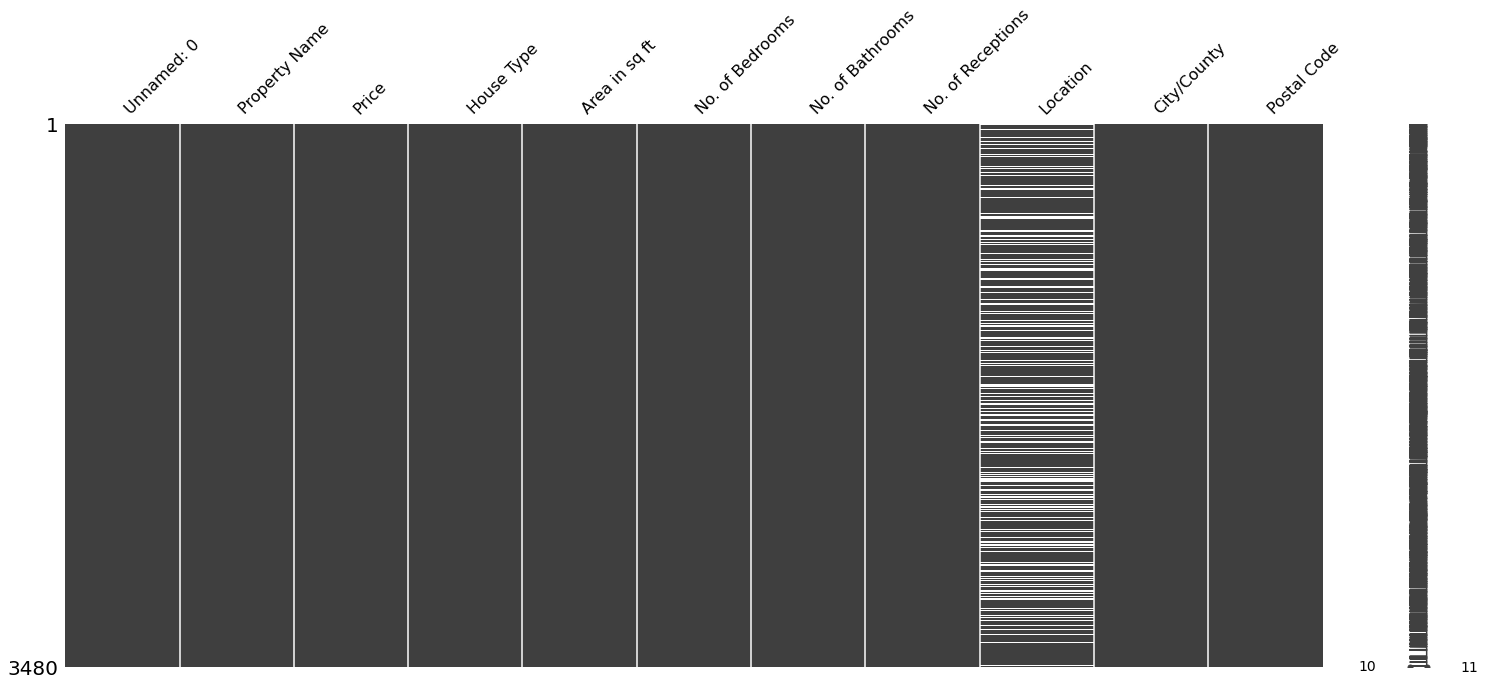

In [3]:
import missingno as msno   
msno.matrix(df)
df.isnull().sum().sum()

In [4]:
def missing_values_table(df):
        mis_val = df.isnull().sum()                                                 # Total missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)                         # Percentage of missing values
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)               # Make a table with the results
        mis_val_table_ren_columns = mis_val_table.rename(                           # Rename the columns
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[                      # Sort the table by percentage of missing descending
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"    # Print some summary information   
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [5]:
missing= missing_values_table(df)
missing

Your selected dataframe has 11 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Location,962,27.6


##ELIMINO COLONNE

In [6]:
df = df.drop('Unnamed: 0', axis=1)

In [7]:
df = df.drop('Location', axis=1)

##CAMBIO ORDINE AL TARGET

In [8]:
df.head()

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County,Postal Code
0,Queens Road,1675000,House,2716,5,5,5,London,SW19 8NY
1,Seward Street,650000,Flat / Apartment,814,2,2,2,London,EC1V 3PA
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,London,SW15 1QL
3,Festing Road,1765000,House,1986,4,4,4,London,SW15 1LP
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,London,SW15 1PL


In [9]:
df=df[["Property Name","House Type","Area in sq ft","No. of Bedrooms","No. of Bathrooms","No. of Receptions","City/County","Postal Code","Price"]]

In [10]:
df.head()

,Property Name,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County,Postal Code,Price
0,Queens Road,House,2716,5,5,5,London,SW19 8NY,1675000
1,Seward Street,Flat / Apartment,814,2,2,2,London,EC1V 3PA,650000
2,Hotham Road,Flat / Apartment,761,2,2,2,London,SW15 1QL,735000
3,Festing Road,House,1986,4,4,4,London,SW15 1LP,1765000
4,Spencer Walk,Flat / Apartment,700,2,2,2,London,SW15 1PL,675000


#TRAIN / TEST SPLIT

In [11]:
train_df, test_df = train_test_split(df, shuffle=True, test_size=0.25, random_state=22)

#EDA

In [12]:
train_df.head()

,Property Name,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County,Postal Code,Price
1935,Bond Mansions,New development,830,1,1,1,Wornington Road,W10 5RZ,710000
3246,Onedin Point,Flat / Apartment,799,2,2,2,London,E1 8JT,600000
351,Westminster Close,House,3112,5,5,5,Middlesex,HA6 2TG,1550000
3073,Carew Road,Flat / Apartment,955,2,2,2,Middlesex,HA6 3NL,500000
1968,Barwell Court Farmhouse,House,1410,3,3,3,Surrey,KT9 2LZ,699950


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2610 entries, 1935 to 2933
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Property Name      2610 non-null   object
 1   House Type         2610 non-null   object
 2   Area in sq ft      2610 non-null   int64 
 3   No. of Bedrooms    2610 non-null   int64 
 4   No. of Bathrooms   2610 non-null   int64 
 5   No. of Receptions  2610 non-null   int64 
 6   City/County        2610 non-null   object
 7   Postal Code        2610 non-null   object
 8   Price              2610 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 203.9+ KB


In [14]:
train_df.describe()

,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Price
count,2610.000000,2610.000000,2610.000000,2610.000000,2.610000e+03
mean,1704.786973,3.089655,3.089655,3.089655,1.844329e+06
std,1352.914728,1.507490,1.507490,1.507490,2.195662e+06
min,274.000000,0.000000,0.000000,0.000000,2.100000e+05
25%,838.250000,2.000000,2.000000,2.000000,7.362500e+05
50%,1298.000000,3.000000,3.000000,3.000000,1.200000e+06
75%,2149.750000,4.000000,4.000000,4.000000,2.100000e+06
max,15405.000000,10.000000,10.000000,10.000000,3.400000e+07


##ESPLORAZIONE DEL TARGET

In [15]:
df.head()

,Property Name,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County,Postal Code,Price
0,Queens Road,House,2716,5,5,5,London,SW19 8NY,1675000
1,Seward Street,Flat / Apartment,814,2,2,2,London,EC1V 3PA,650000
2,Hotham Road,Flat / Apartment,761,2,2,2,London,SW15 1QL,735000
3,Festing Road,House,1986,4,4,4,London,SW15 1LP,1765000
4,Spencer Walk,Flat / Apartment,700,2,2,2,London,SW15 1PL,675000


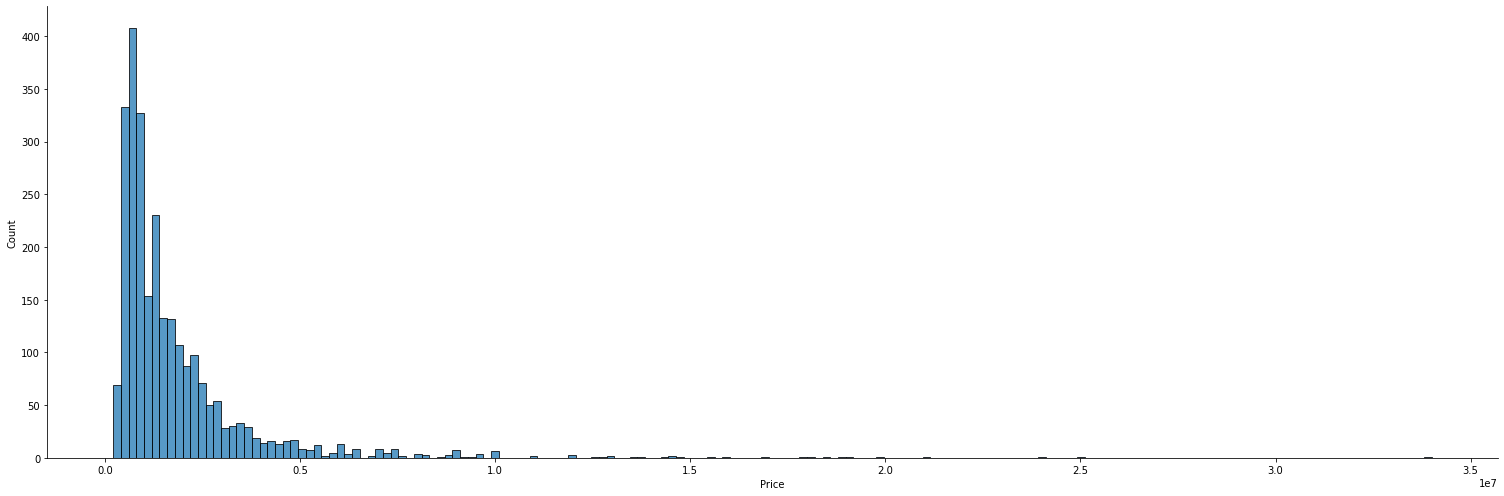

In [16]:
target_name = 'Price'
sns.displot(train_df[target_name],height =7,aspect=3)

In [33]:
#Univariate analysis for numerical/continuos variables

def num_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(30,5))
    sns.histplot(x = col_data, kde=True, ax=ax[0], color = 'purple')
    ax[0].axvline(col_data.mean(), color='r', linestyle='--',linewidth=2)
    ax[0].axvline(col_data.median(), color='k', linestyle='dashed', linewidth=2)
    ax[0].legend({'Mean':col_data.mean(),'Median':col_data.median()})
    sns.boxplot(x=col_data, showmeans=True, ax=ax[1])
    plt.xticks(rotation = 30)
    plt.tight_layout()
    plt.show()

In [31]:
numerical_cols = ['Price']

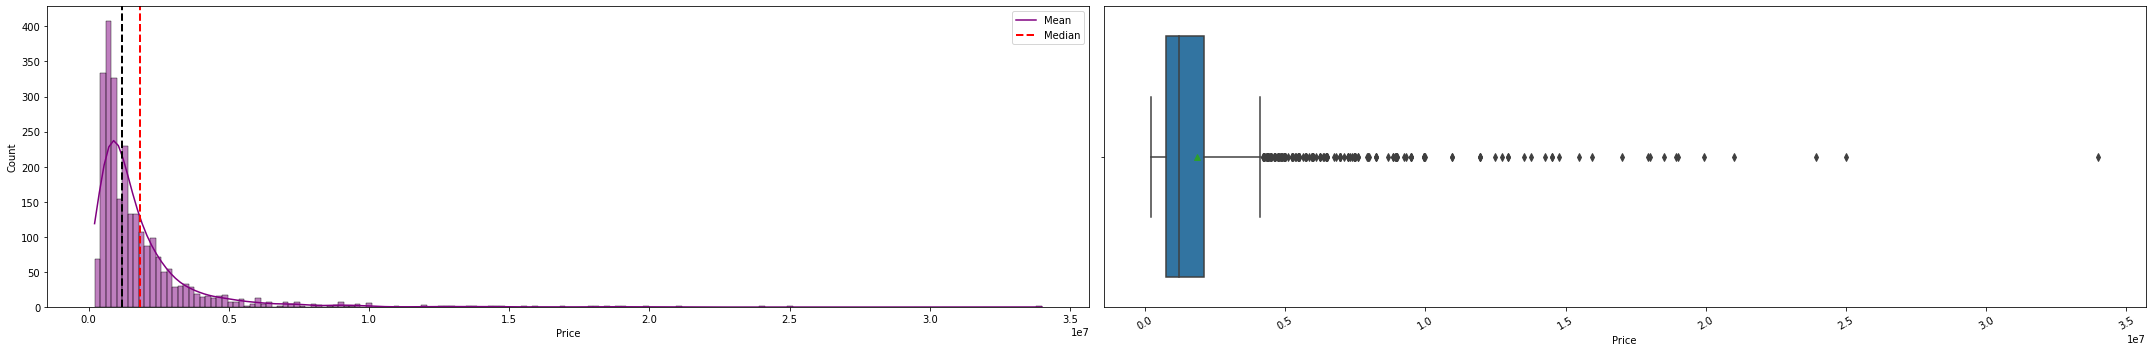

In [34]:
for i in numerical_cols:
    num_feat(train_df[i])

In [17]:
train_df["Price"].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 1935     710000
3246     600000
351     1550000
3073     500000
1968     699950
         ...   
356     1150000
3008    1150000
812     1215000
2180     590000
2933    3450000
Name: Price, Length: 2610, dtype: int64>

In [18]:
print("Skewness:",train_df["Price"].skew())
print("Kurtosis:",train_df["Price"].kurt())

Skewness: 5.135346468616053
Kurtosis: 41.95811156305255


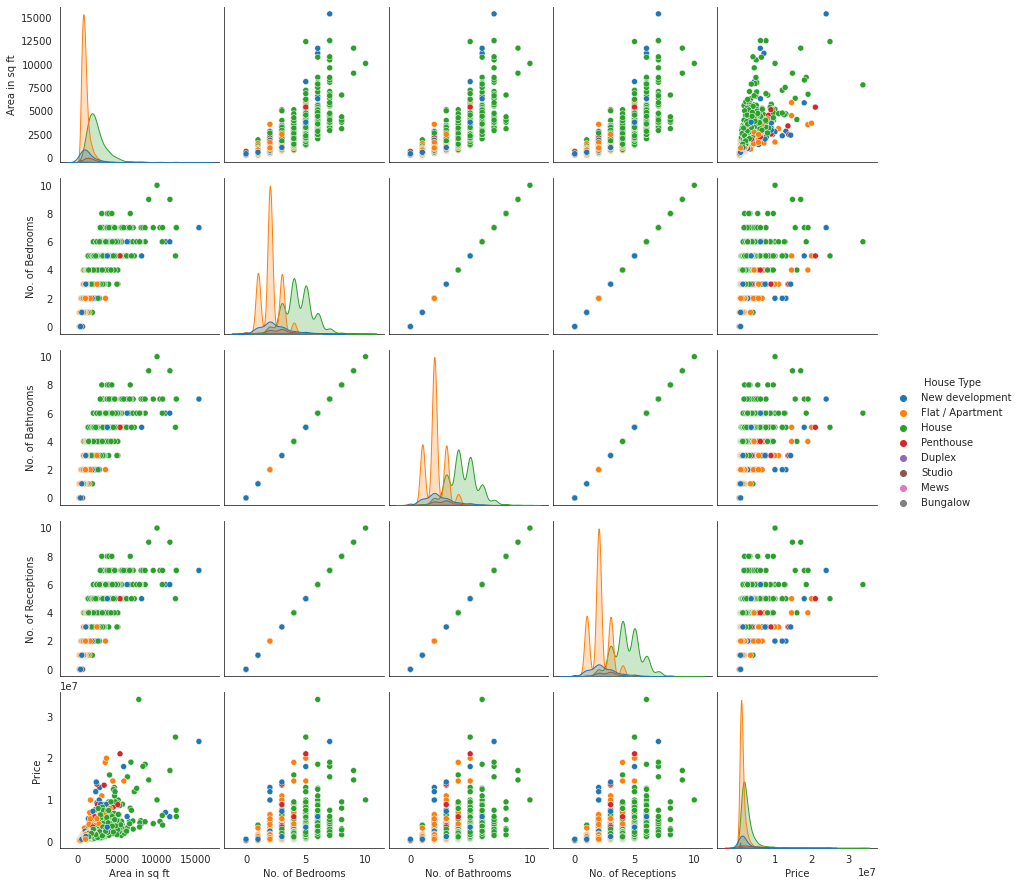

In [35]:
sns.set_style('white')
sns.pairplot(train_df,hue='House Type')
plt.show()

##RELAZIONE FEATURES NUMERICHE CON IL TARGET

In [19]:
train_df.corr()

,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Price
Area in sq ft,1.000000,0.777167,0.777167,0.777167,0.686659
No. of Bedrooms,0.777167,1.000000,1.000000,1.000000,0.450983
No. of Bathrooms,0.777167,1.000000,1.000000,1.000000,0.450983
No. of Receptions,0.777167,1.000000,1.000000,1.000000,0.450983
Price,0.686659,0.450983,0.450983,0.450983,1.000000


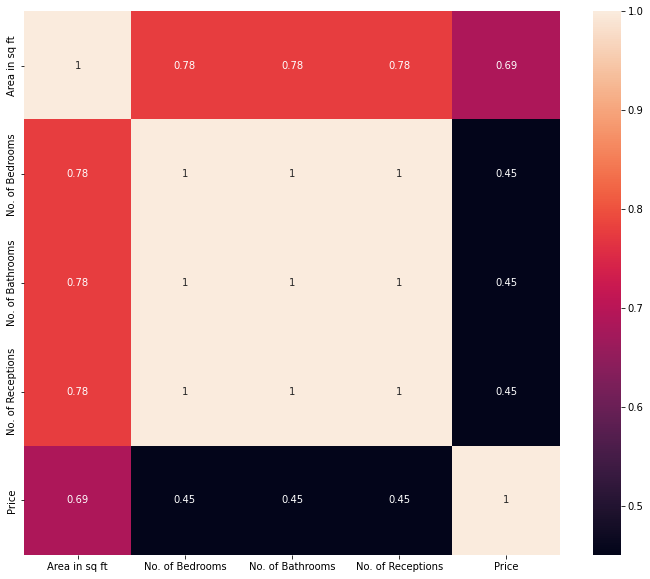

In [20]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(train_df.corr(),annot=True);

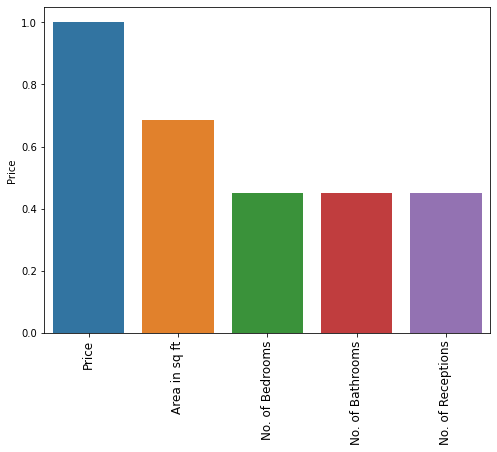

In [21]:
price_corr = train_df.corr() ["Price"].abs().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=price_corr.index, y=price_corr)
plt.xticks(rotation=90, fontsize=12)
plt.show()

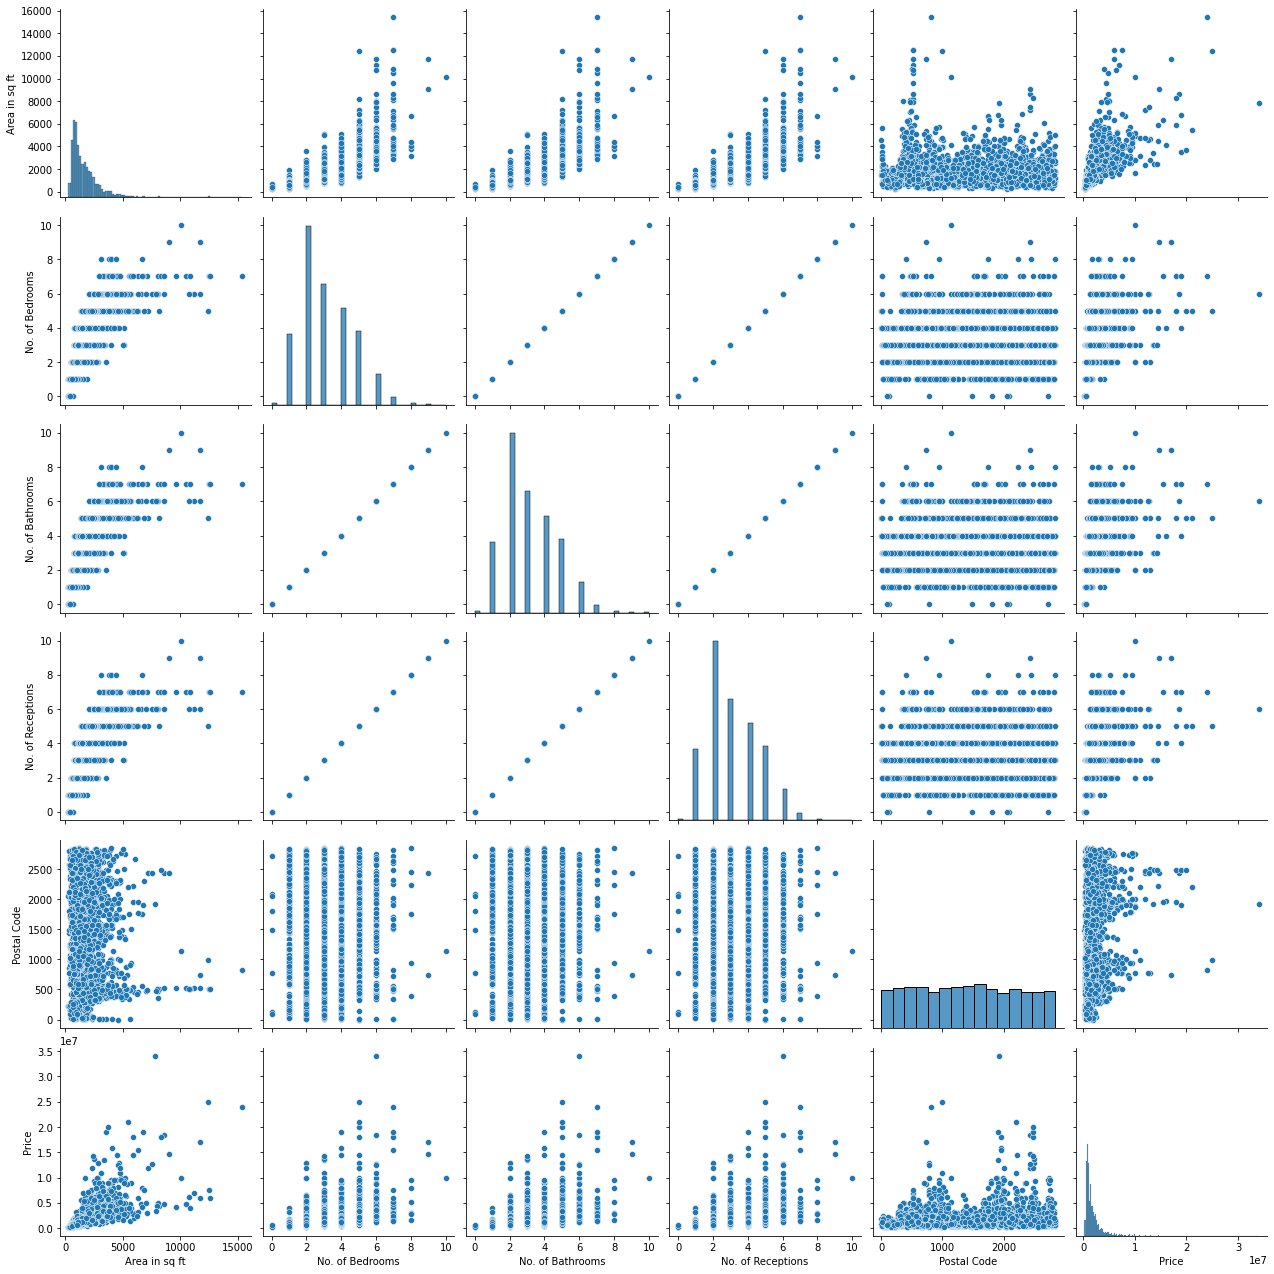

In [ ]:
sns.pairplot(train_df, height=3, aspect=1)

##RELAZIONE DELLE FEATURES CATEGORICHE CON IL TARGET

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2610 entries, 1935 to 2933
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Property Name      2610 non-null   object
 1   House Type         2610 non-null   object
 2   Area in sq ft      2610 non-null   int64 
 3   No. of Bedrooms    2610 non-null   int64 
 4   No. of Bathrooms   2610 non-null   int64 
 5   No. of Receptions  2610 non-null   int64 
 6   City/County        2610 non-null   object
 7   Postal Code        2610 non-null   object
 8   Price              2610 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 203.9+ KB


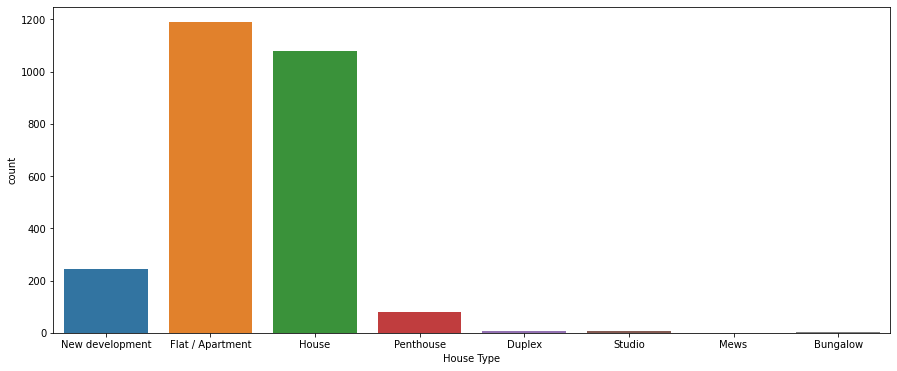

In [23]:
plt.figure(figsize=(15,6))
sns.countplot(x='House Type',data=train_df)



In [24]:
#EDA on Univariate Categorical variables

def cat_feat(col_data):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    fig.suptitle(col_data.name+' wise sale',fontsize=15)
    sns.countplot(col_data,ax=ax[0])
    col_data.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1], shadow = True)
    plt.tight_layout()

In [25]:
categorical_cols = ['House Type']

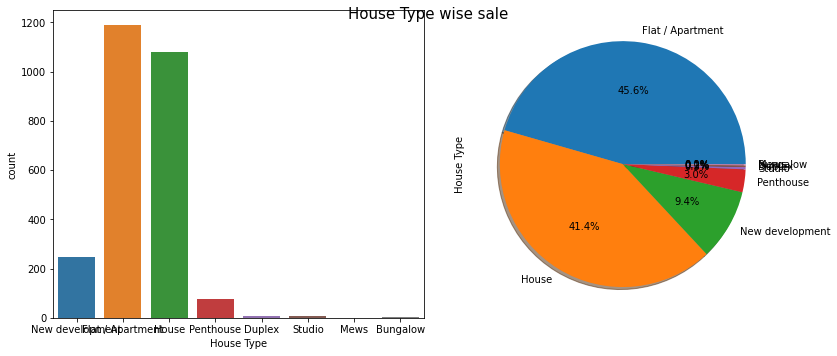

In [26]:
for i in categorical_cols:
    cat_feat(train_df[i])

In [ ]:
train_df['Property Name'].value_counts()

Television Centre    13
Bishops Gate         10
City Road             9
Eaton Square          9
Tollington Way        7
                     ..
Copsem Lane           1
Bristol House         1
St. George Wharf      1
Abbeville Road        1
Marryat Place         1
Name: Property Name, Length: 1928, dtype: int64

In [ ]:
train_df['Postal Code'].value_counts()

SW6 3LF     10
SW6 1UE      8
SW15 2BS     7
N7 6RG       7
EC3R 6EA     6
            ..
SW4 7EB      1
SW13 0ES     1
SW1P 2EE     1
SW18 5NN     1
SW19 5BL     1
Name: Postal Code, Length: 2221, dtype: int64

In [ ]:
categorical_features = train_df[[col for col in train_df.columns if train_df[col].dtype==object]].columns

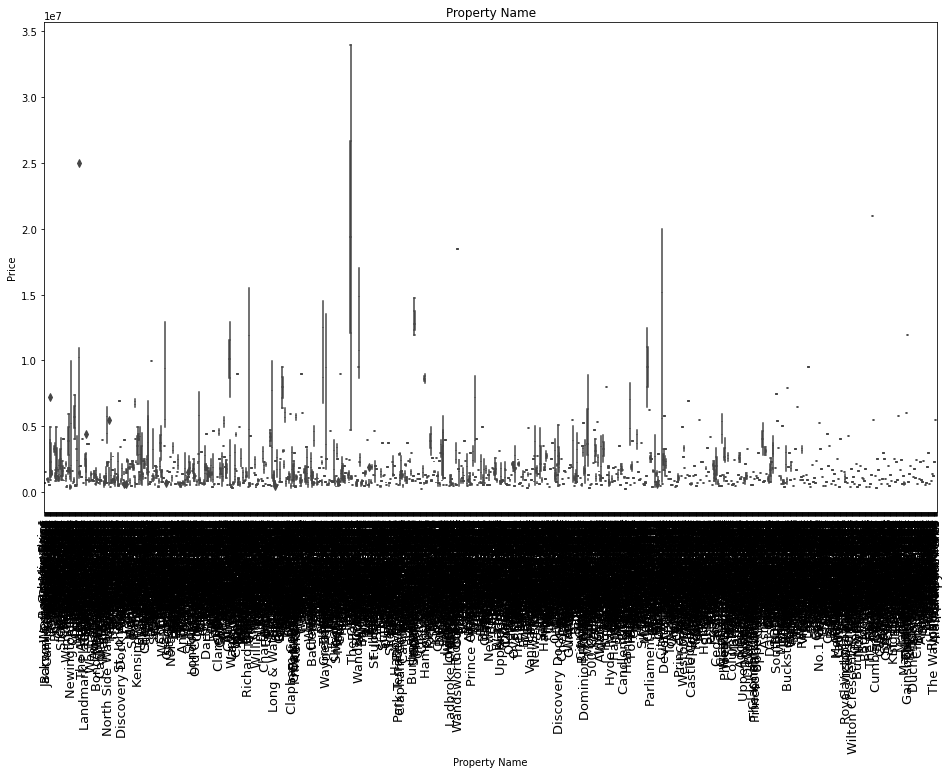

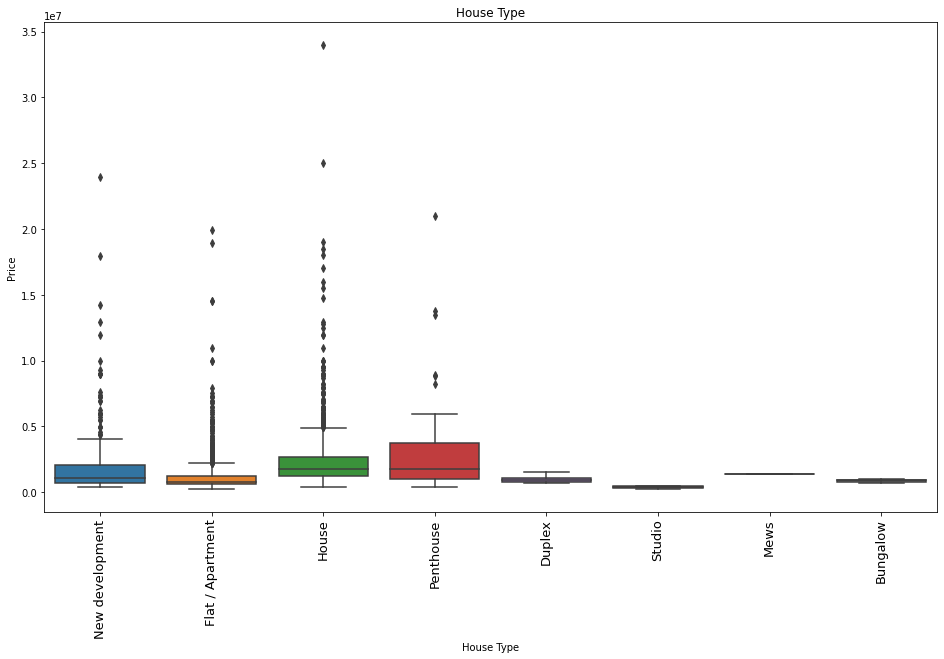

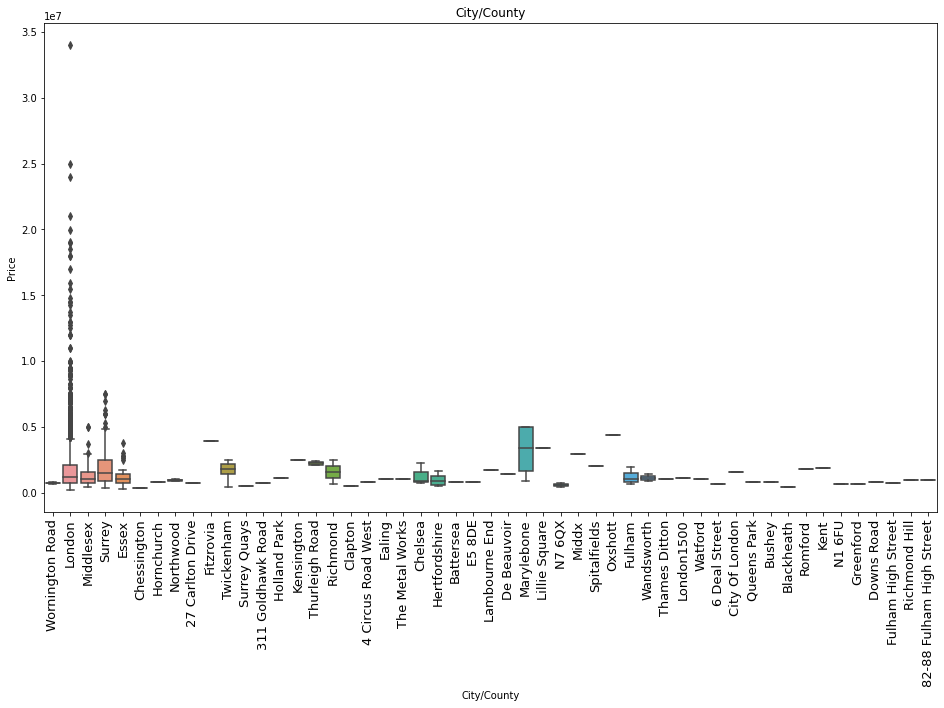

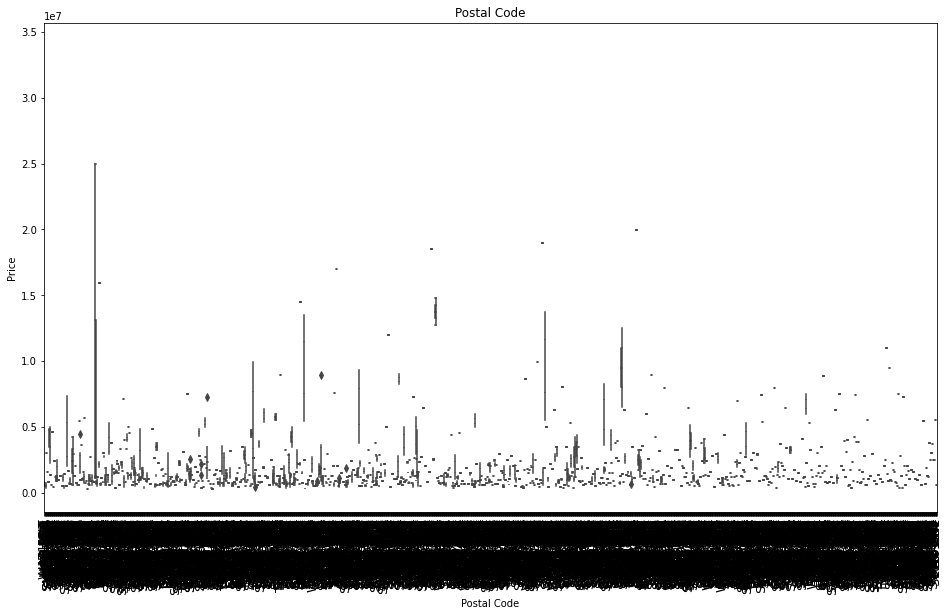

In [ ]:
### Property Name VS Price
for feature in categorical_features:
  plt.figure(figsize=(16,9))
  sns.boxplot(x=feature, y=target_name, data=train_df)
  plt.title(feature)
  plt.xticks(rotation=90, fontsize=13);

##LABEL ENCODING

In [ ]:
#train_df.replace({'House Type':{'Flat / Apartment':7,'House':6,'New development':5,'Penthouse':4,'Studio':3,'Duplex':2,'Bungalow':1,'Mews':0}}, inplace=True)

In [ ]:
train_df['House Type'].value_counts()

Flat / Apartment    1189
House               1080
New development      245
Penthouse             78
Studio                 8
Duplex                 6
Bungalow               3
Mews                   1
Name: House Type, dtype: int64

In [ ]:
train_df['City/County'].value_counts()

In [ ]:
train_df.head()

,Property Name,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County,Postal Code,Price
1935,Bond Mansions,New development,830,1,1,1,Wornington Road,W10 5RZ,710000
3246,Onedin Point,Flat / Apartment,799,2,2,2,London,E1 8JT,600000
351,Westminster Close,House,3112,5,5,5,Middlesex,HA6 2TG,1550000
3073,Carew Road,Flat / Apartment,955,2,2,2,Middlesex,HA6 3NL,500000
1968,Barwell Court Farmhouse,House,1410,3,3,3,Surrey,KT9 2LZ,699950


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2610 entries, 1935 to 2933
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Property Name      2610 non-null   object
 1   House Type         2610 non-null   object
 2   Area in sq ft      2610 non-null   int64 
 3   No. of Bedrooms    2610 non-null   int64 
 4   No. of Bathrooms   2610 non-null   int64 
 5   No. of Receptions  2610 non-null   int64 
 6   City/County        2610 non-null   object
 7   Postal Code        2610 non-null   object
 8   Price              2610 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 268.4+ KB


In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(train_df.corr(),annot=True);

##FEATURES IMPORTANCES CON RANDOMFOREST

In [ ]:
X = train_df[["Area in sq ft","No. of Bedrooms","No. of Bathrooms","No. of Receptions"]]
y= train_df["Price"]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model = model.fit(X,y)

In [ ]:
importances = pd.Series(model.feature_importances_, index=model.feature_names_in_).sort_values(ascending=False)

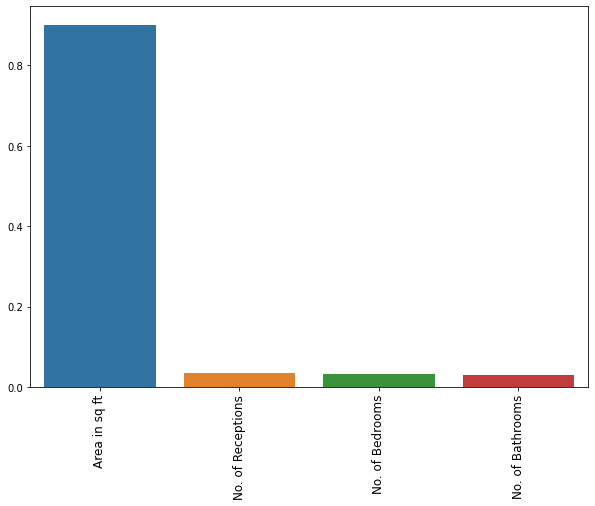

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x=importances.index, y=importances)
plt.xticks(rotation=90, fontsize=12)
plt.show()

In [ ]:
train_df

,Property Name,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,City/County,Postal Code,Price
1935,Bond Mansions,New development,830,1,1,1,Wornington Road,W10 5RZ,710000
3246,Onedin Point,Flat / Apartment,799,2,2,2,London,E1 8JT,600000
351,Westminster Close,House,3112,5,5,5,Middlesex,HA6 2TG,1550000
3073,Carew Road,Flat / Apartment,955,2,2,2,Middlesex,HA6 3NL,500000
1968,Barwell Court Farmhouse,House,1410,3,3,3,Surrey,KT9 2LZ,699950
...,...,...,...,...,...,...,...,...,...
356,Ripplevale Grove,Flat / Apartment,1074,3,3,3,London,N1 1HT,1150000
3008,Newark Street,House,1447,4,4,4,London,E1 2AA,1150000
812,Carlton House,New development,1091,3,3,3,London,SW15 2BS,1215000
2180,Alaska Apartments,Flat / Apartment,1048,2,2,2,London,E16 1BW,590000


In [ ]:
importances

Area in sq ft        0.902392
No. of Bathrooms     0.034941
No. of Receptions    0.032737
No. of Bedrooms      0.029930
dtype: float64

##CATEGORICAL FEATURES CON DUMMIES

In [ ]:
categorical_features = ['House Type']
train_dummies = pd.get_dummies(train_df[categorical_features], drop_first=True)

#FEATURES E TARGET

In [ ]:
features_list = ['Area in sq ft']

X_train = train_df[features_list].copy()
y_train = train_df['Price'].copy()

X_test = test_df[features_list].copy()
y_test = test_df['Price'].copy()

In [ ]:
train_dummies = pd.get_dummies(train_df[categorical_features], drop_first=True)
X_train = pd.concat([X_train,train_dummies], axis=1, ignore_index=False)

test_dummies = pd.get_dummies(test_df[categorical_features], drop_first=True)
X_test = pd.concat([X_test,test_dummies], axis=1, ignore_index=False)

In [ ]:
X_train

,Area in sq ft
1935,830
3246,799
351,3112
3073,955
1968,1410
...,...
356,1074
3008,1447
812,1091
2180,1048


##STANDARDIZATION

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)

#MODELS

##Linear Regression

In [ ]:
### LINEAR REGRESSION

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

### evaluation
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

print(r2_train)
print(r2_test)

0.4714999227066031
0.3844238268498523


##K-NN

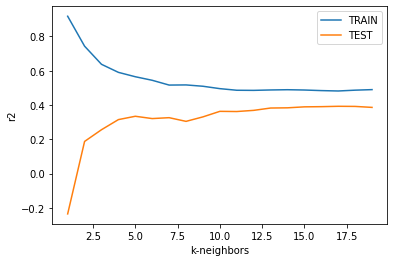

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

r2_train_list = list()
r2_test_list = list()
for k in range(1,20):
    model = KNeighborsRegressor(n_neighbors=k)
    model = model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    ### evaluation
    from sklearn.metrics import r2_score

    r2_train = r2_score(y_train, train_preds)
    r2_test = r2_score(y_test, test_preds)

    r2_train_list += [r2_score(y_train, train_preds)]
    r2_test_list += [r2_score(y_test, test_preds)]

plt.plot(range(1,20), r2_train_list, label='TRAIN')
plt.plot(range(1,20), r2_test_list, label='TEST')
plt.xlabel('k-neighbors')
plt.ylabel('r2')
plt.legend()
plt.show()

In [ ]:
k=10
model = KNeighborsRegressor(n_neighbors=k)
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

### evaluation
from sklearn.metrics import r2_score

print(r2_score(y_train, train_preds))
print(r2_score(y_test, test_preds))

0.49918697349871466
0.36412287417877454


##RANDOMFOREST

100%|██████████| 19/19 [00:06<00:00,  2.97it/s]


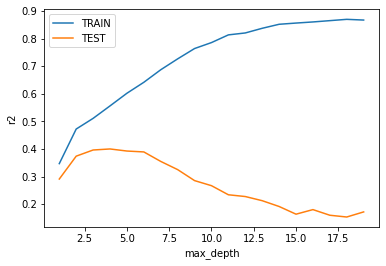

In [ ]:
### TUNING max_depth

from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm

r2_train_list = list()
r2_test_list = list()
max_depth_range = range(1,20)

for d in tqdm(max_depth_range):
    model = RandomForestRegressor(max_depth=d)
    model = model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    ### evaluation
    from sklearn.metrics import r2_score

    r2_train = r2_score(y_train, train_preds)
    r2_test = r2_score(y_test, test_preds)

    r2_train_list += [r2_score(y_train, train_preds)]
    r2_test_list += [r2_score(y_test, test_preds)]

plt.plot(max_depth_range, r2_train_list, label='TRAIN')
plt.plot(max_depth_range, r2_test_list, label='TEST')
plt.xlabel('max_depth')
plt.ylabel('r2')
plt.legend()
plt.show()

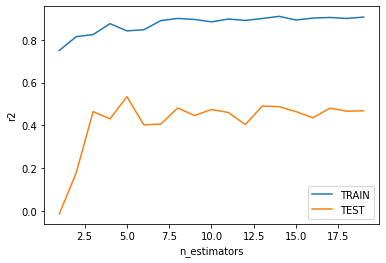

In [ ]:
### TUNING n_estimators

r2_train_list = list()
r2_test_list = list()
n_estimators_range = range(1,20)

for n in n_estimators_range:
    model = RandomForestRegressor(n_estimators=n)
    model = model.fit(X_train, y_train)

    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    ### evaluation
    from sklearn.metrics import r2_score

    r2_train = r2_score(y_train, train_preds)
    r2_test = r2_score(y_test, test_preds)

    r2_train_list += [r2_score(y_train, train_preds)]
    r2_test_list += [r2_score(y_test, test_preds)]


plt.plot(n_estimators_range, r2_train_list, label='TRAIN')
plt.plot(n_estimators_range, r2_test_list, label='TEST')
plt.xlabel('n_estimators')
plt.ylabel('r2')
plt.legend()
plt.show()

In [ ]:
### final model

model = RandomForestRegressor(n_estimators=5, max_depth=5)
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

### evaluation
from sklearn.metrics import r2_score

print(r2_score(y_train, train_preds))
print(r2_score(y_test, test_preds))

0.6592193018307374
0.4905339538522301


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [ ]:
def evaluate(targets, preds, title, plots=True, verbose=True):
    
    mape = mean_absolute_percentage_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose:
        print(title)
        print('MAPE: ', mape)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(np.arange(0,targets.max()), np.arange(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mape':mape, 'r2':r2}

TRAIN SET
MAPE:  0.23861637305801425
R2:  0.8669698115847331


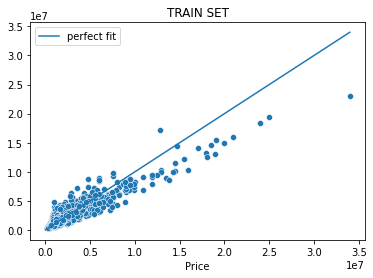

TEST SET
MAPE:  0.4425510400462435
R2:  0.17215430516823238


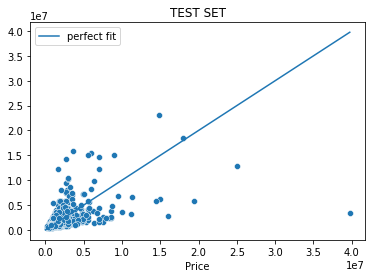

In [ ]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_metrics = evaluate(y_train, train_preds, 'TRAIN SET')
test_metrics = evaluate(y_test, test_preds, 'TEST SET')
